# ML AAT
Sentiment Analysis of Airline tweet review

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [29]:
## Load data
df = pd.read_csv('Tweets.csv')

In [30]:
## seeing the data
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [31]:
# getting info about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [32]:
# describe the data
print(df.describe())

           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000  


In [33]:
# shape of the data
print(df.shape)

(14640, 15)


# Exploratory Data Analysis

In [34]:
# Getting list of all airlines
airlines = list(df['airline'].unique())

print(airlines)

['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']


In [35]:
# count nullvalue percerntage
print(df.isnull().sum()/df.shape[0]*100)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64


We can see that none of the text is null , so we can use all the 14640 tweets to do sentimental analysis

In [36]:
# drop inplace airline_sentiment_gold
df.drop(['airline_sentiment_gold'], axis=1, inplace=True)
# drop inplace negativereason_gold
df.drop(['negativereason_gold'], axis=1, inplace=True)
# drop tweet_coord inplace
df.drop(['tweet_coord'], axis=1, inplace=True)
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


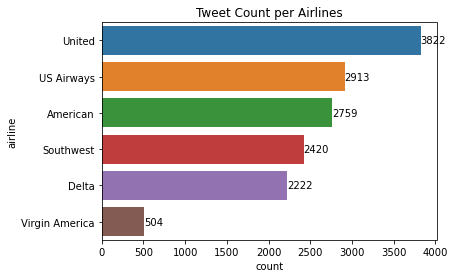

In [37]:
# Plotting Total tweet counts per airline
cntairplot = sns.countplot(data = df, y = 'airline',
                   order = df.airline.value_counts().index)
cntairplot.bar_label(cntairplot.containers[0])
cntairplot.set_title('Tweet Count per Airlines',)
                                    
plt.show()

The above plot shows that United (airline) is the most popular one on twitter , but we still do not know sentiment towards the airline , if its positive ,  negative or neutral.

Total number of sentiments of tweets :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


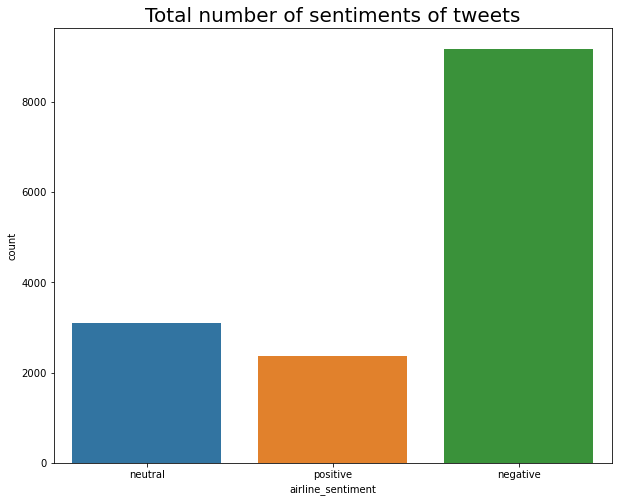

In [38]:
print("Total number of sentiments of tweets :")
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

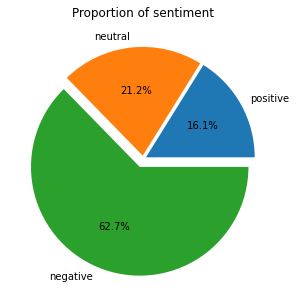

In [39]:
x = df.airline_sentiment.value_counts().sort_values()

plt.figure(figsize=(5, 5))
ax = plt.pie(x = x, labels=x.index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])

plt.title('Proportion of sentiment')

plt.show()

Airline vs Sentiment
airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152


<AxesSubplot:xlabel='airline'>

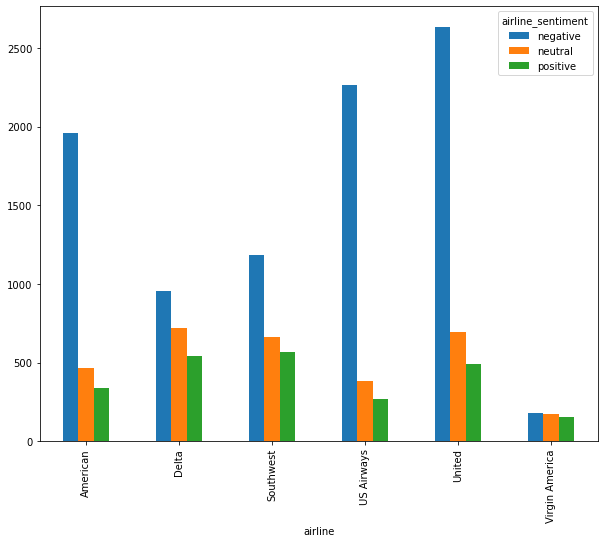

In [40]:
a = (df.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count().unstack())

print("Airline vs Sentiment")
print(a)

# plot a
a.plot(kind = 'bar', stacked = False, figsize = (10, 8))

In [41]:
df_neg = df[df.airline_sentiment == 'negative']
names = df.airline.unique()
for name in names:
    print(f"{name} : Out of total {format(len(df[df.airline == name]),',')}customers, {(len(df_neg[df_neg.airline == name]) / len(df[df.airline == name]))*100:.1f}% feel negative.\n")


Virgin America : Out of total 504customers, 35.9% feel negative.

United : Out of total 3,822customers, 68.9% feel negative.

Southwest : Out of total 2,420customers, 49.0% feel negative.

Delta : Out of total 2,222customers, 43.0% feel negative.

US Airways : Out of total 2,913customers, 77.7% feel negative.

American : Out of total 2,759customers, 71.0% feel negative.



Reasons Of Negative Tweets : green
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


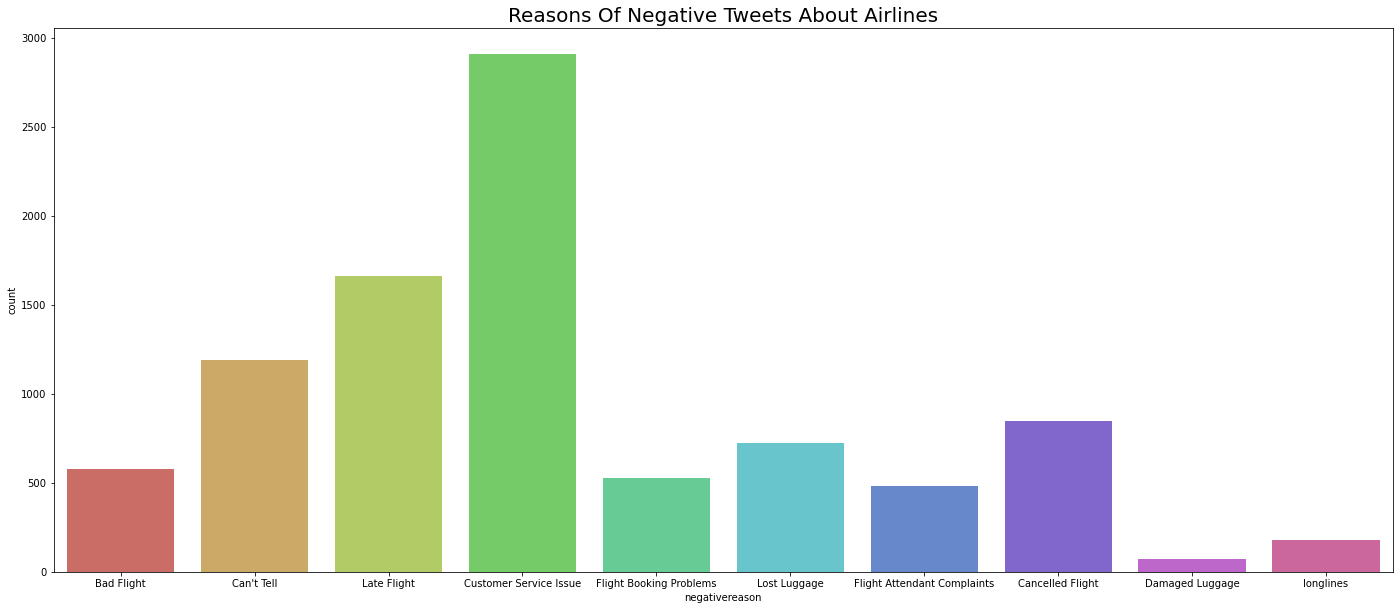

In [42]:
print('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts())

plt.figure(figsize = (24, 10))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

In [43]:
m = df.groupby(['airline', 'negativereason'])['negativereason'].count().unstack()
m

negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
airline,,,,,,,,,,
American,87,198,246,768,12,87,130,249,149,34
Delta,64,186,51,199,11,60,44,269,57,14
Southwest,90,159,162,391,14,38,61,152,90,29
US Airways,104,246,189,811,11,123,122,453,154,50
United,216,379,181,681,22,168,144,525,269,48
Virgin America,19,22,18,60,4,5,28,17,5,3


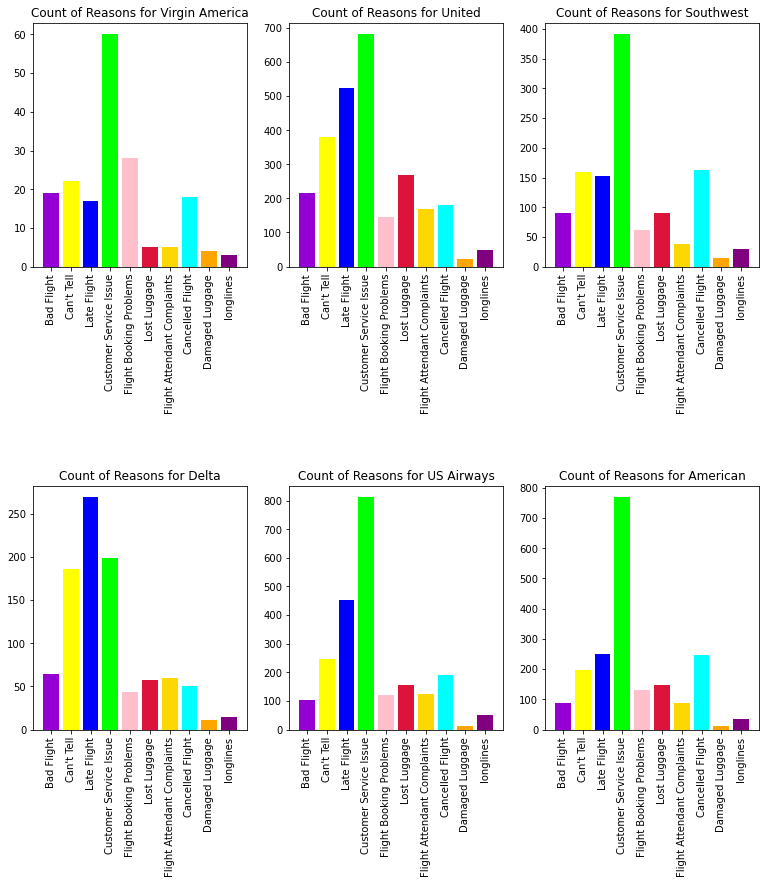

In [44]:
NR_Count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
    
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

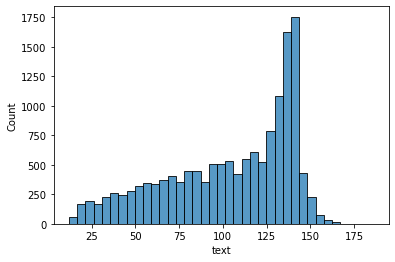

In [45]:
sns.histplot(df.text.str.len())
plt.show()

In [46]:
textdetails = df.text.str.len()
textdetails.describe()

count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: text, dtype: float64

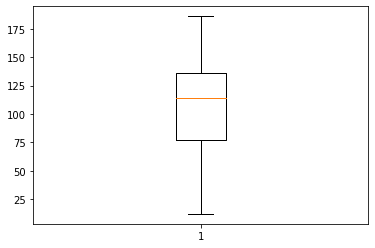

In [47]:
plt.boxplot(textdetails)
plt.show()

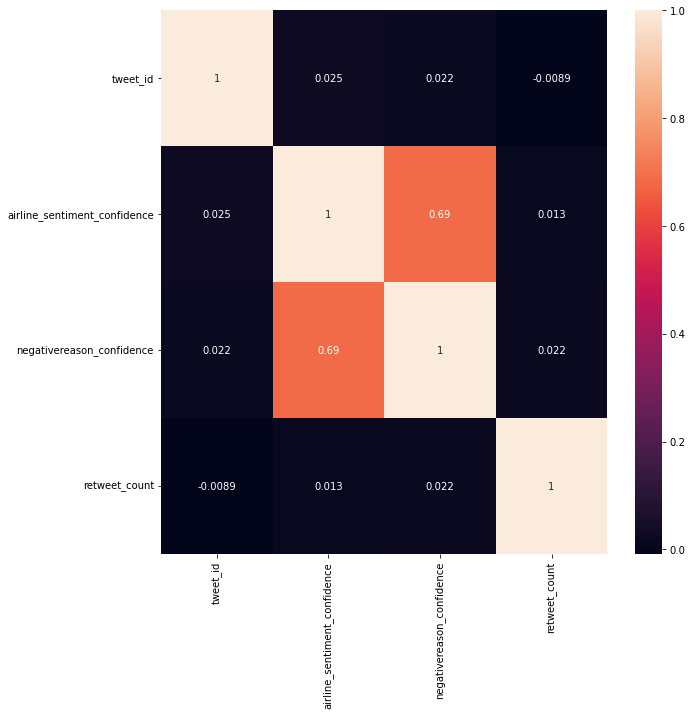

In [48]:
 # heatmap of the data
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [49]:
!pip install wordcloud

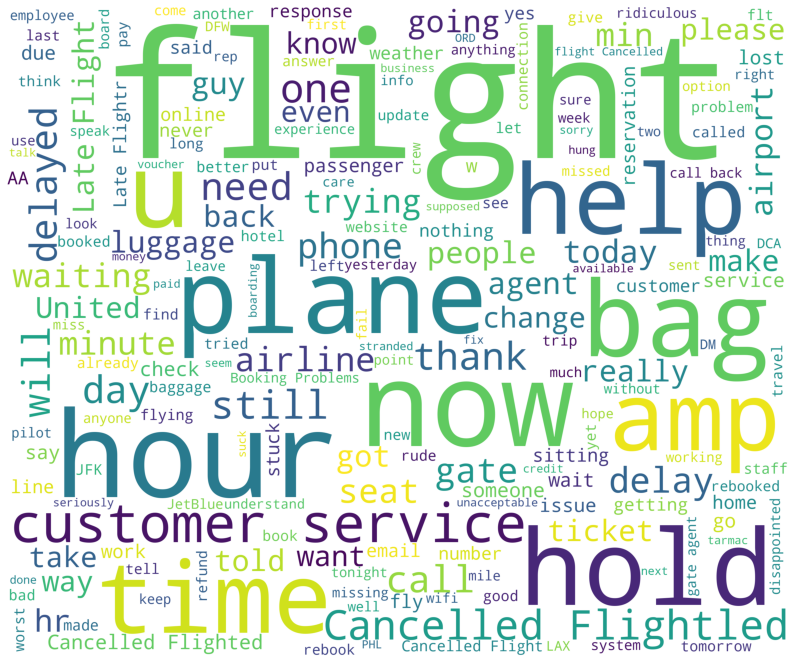

In [50]:
from wordcloud import WordCloud, STOPWORDS
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(14, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

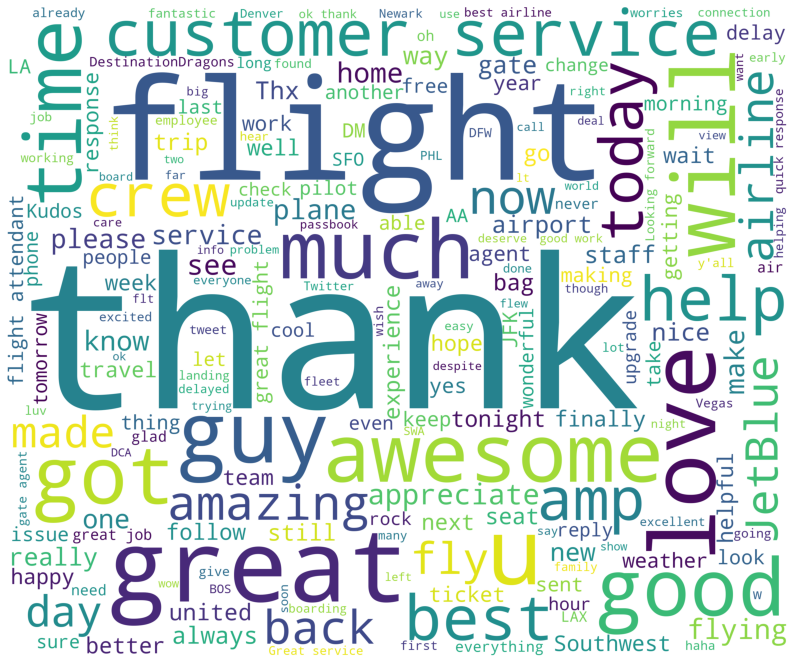

In [51]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(14, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

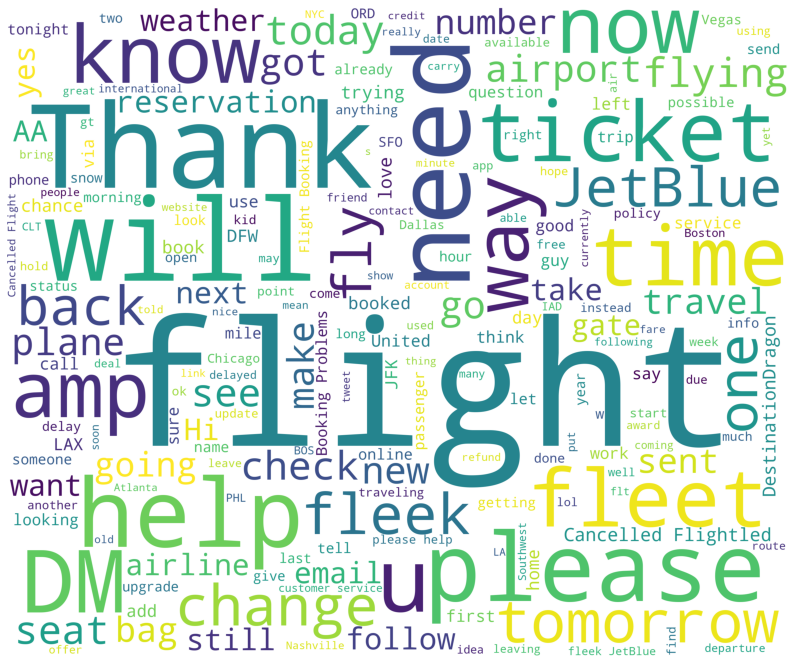

In [52]:
new_df=df[df['airline_sentiment']=='neutral']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(14, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Text Data Processing

In [53]:
!pip install nltk

In [54]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# def clean_text(d):
#     pattern = r'[^a-zA-Z\s]'
#     text = re.sub(pattern, '', d)
#     return text

# names = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
#          'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
#          'flight', 'airline', 'airlines']

# # I thought the words related the name of airlines are not relevant to the sentiment analysis
# # Therefore I decided to append the above names into the list of stop words.
# def clean_stopword(d):
#     stop_words = stopwords.words('english')
#     for name in names:
#         stop_words.append(name)
#     return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])

# def tokenize(d):
#     return word_tokenize(d)


# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))


[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [55]:
df['final_text']

# df['final_text']= df.text.apply(clean_text).apply(clean_stopword).apply(tokenize)
# df.final_text.head()

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

In [56]:
df.text[1]

"@VirginAmerica plus you've added commercials to the experience... tacky."

In [57]:
# convert df.final_text to string
# df.final_text = df.final_text.apply(lambda x: ' '.join(x))

In [58]:
# label encode airline_sentiment
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airline_sentiment_encoded'] = le.fit_transform(df.airline_sentiment)

df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,final_text,airline_sentiment_encoded
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said,1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added commercials experience tacky,2
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip,1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),bad flight really aggressive blast obnoxious e...,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),ca tell really big bad thing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,NaN,NaN,thank got different flight chicago,2
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,Texas,NaN,customer service issue leaving minutes late fl...,0
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,please bring american airlines blackberry,1
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),customer service issue money change flight ans...,0


# Train Test Splitting

In [59]:
X = df['final_text']
y = df['airline_sentiment_encoded']
# y = df['airline_sentiment']
print(X)
print(y)

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object
0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment_encoded, Length: 14640, dtype: int64


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)
X_final.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
from sklearn.model_selection import train_test_split
def kfold_train_test_split(x, y, train_indices, test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

In [63]:
#sklearn version print
from imblearn.over_sampling import SMOTE # Handling Imbalanced
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling as implemented in StratifiedKFold and StratifiedShuffleSplit to ensure that relative class frequencies is approximately preserved in each train and validation fold.StratifiedShuffleSplit is a variation of ShuffleSplit, which returns stratified splits, i.e which creates splits by preserving the same percentage for each target class as in the complete set.

In [64]:
stratified_shuffled_k_fold = sklearn.model_selection.StratifiedShuffleSplit(n_splits=5,test_size=0.4)

scores = [] 

for train_indices, test_indices in stratified_shuffled_k_fold.split(x_sm,y_sm):
    # Split data using our predefined function
    X_train, X_test, y_train, y_test = kfold_train_test_split(x_sm, y_sm, train_indices, test_indices)

# Model Building

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

Text(0, 0.5, 'Error Rate')

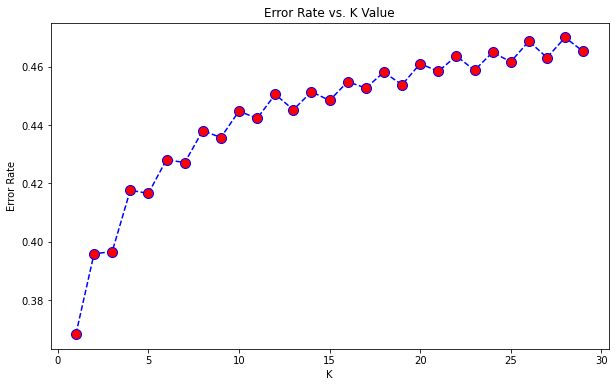

In [66]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_knn!=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [67]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
print(std_acc)

[0.63165063 0.60414019 0.60341384 0.58234974 0.58343926 0.57181769
 0.57290721 0.56192119 0.56428182 0.55520247 0.55774469 0.54948248
 0.5547485  0.54857454 0.55157073 0.54512439 0.54730343 0.54185582
 0.54621391 0.53895043 0.54158344 0.53631741 0.54122027 0.5350463
 0.53831487 0.53123298 0.53686218 0.52996187 0.53477392]
[0.00459617 0.0046598  0.00466127 0.00469922 0.00469747 0.00471488
 0.00471336 0.00472761 0.00472474 0.00473516 0.0047324  0.00474089
 0.00473564 0.00474175 0.00473887 0.00474484 0.00474291 0.00474756
 0.00474389 0.0047498  0.00474778 0.0047517  0.00474806 0.00475256
 0.00475027 0.00475498 0.00475132 0.00475572 0.00475275]


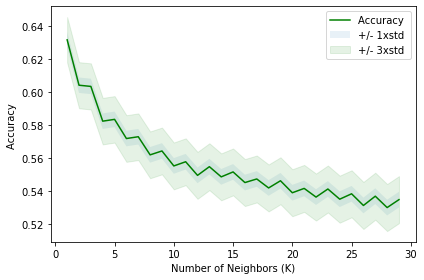

The best accuracy was with 0.6316506264753949 with k= 1


In [68]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

              precision    recall  f1-score   support

           0       0.97      0.09      0.17      3671
           1       0.56      0.89      0.69      3672
           2       0.70      0.91      0.79      3671

    accuracy                           0.63     11014
   macro avg       0.74      0.63      0.55     11014
weighted avg       0.74      0.63      0.55     11014

0.6316506264753949


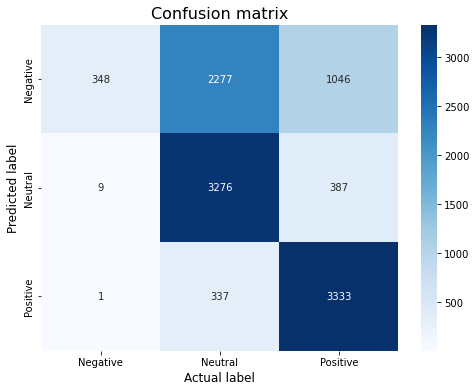

In [69]:
# heading knn algorithm
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))
cm = (confusion_matrix(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))

plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

Classification Report:
----------------------

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3671
           1       0.89      0.89      0.89      3672
           2       0.90      0.90      0.90      3671

    accuracy                           0.92     11014
   macro avg       0.92      0.92      0.92     11014
weighted avg       0.92      0.92      0.92     11014



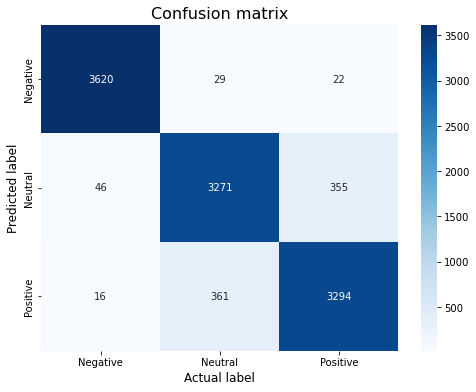

In [70]:
ds = DecisionTreeClassifier()
ds.fit(X_train,y_train)
ds_prediction =  ds.predict(X_test)
accuracy_score(ds_prediction,y_test)

print("Classification Report:\n----------------------\n",)
print(classification_report(y_test,ds_prediction))

cm = confusion_matrix(y_test,ds_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

In [71]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=150)

Classification Report:
----------------------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3671
           1       0.92      0.91      0.92      3672
           2       0.93      0.92      0.92      3671

    accuracy                           0.94     11014
   macro avg       0.94      0.94      0.94     11014
weighted avg       0.94      0.94      0.94     11014



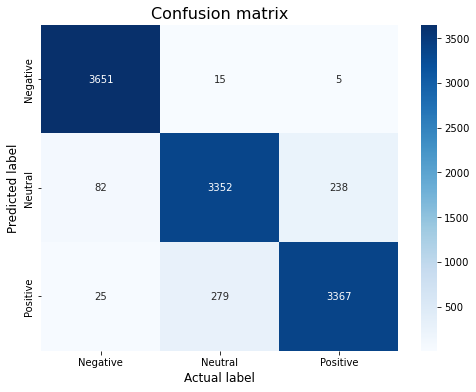

In [72]:
rf_prediction =  rf.predict(X_test)
accuracy_score(rf_prediction,y_test)

print("Classification Report:\n----------------------\n",)
print(classification_report(y_test,rf_prediction))

cm = confusion_matrix(y_test,rf_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()


Classification Report:
----------------------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3671
           1       0.81      0.91      0.85      3672
           2       0.92      0.78      0.84      3671

    accuracy                           0.89     11014
   macro avg       0.90      0.89      0.89     11014
weighted avg       0.90      0.89      0.89     11014



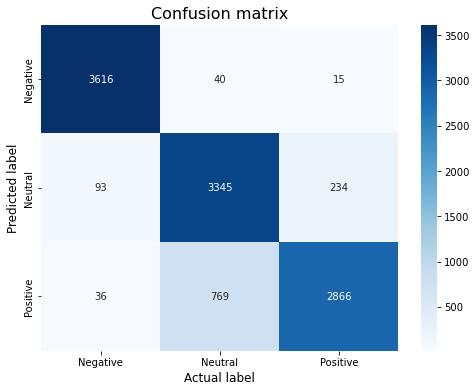

In [73]:
# logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
accuracy_score(lr_prediction,y_test)

print("Classification Report:\n----------------------\n",)
print(classification_report(y_test,lr_prediction))
cm = confusion_matrix(y_test,lr_prediction)
# plot confusion matrix
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
xticklabels=sentiment_classes,
yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

In [74]:
# import logloss function
# print logloss
lr_prediction = lr.predict_proba(X_test)
from sklearn.metrics import log_loss
print("Logloss:", log_loss(y_test,lr_prediction))

Logloss: 0.3373834461356439


Classification Report:
----------------------

              precision    recall  f1-score   support

    negative       0.80      0.97      0.87      3672
     neutral       0.91      0.70      0.79      3671
    positive       0.87      0.89      0.88      3671

    accuracy                           0.85     11014
   macro avg       0.86      0.85      0.85     11014
weighted avg       0.86      0.85      0.85     11014



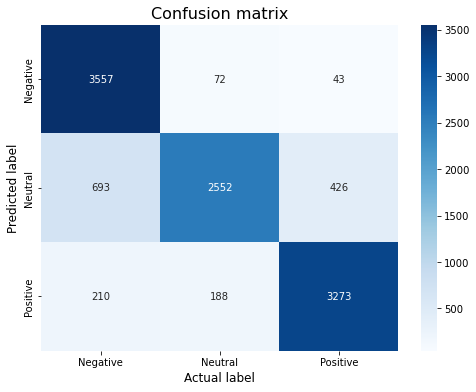

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

print("Classification Report:\n----------------------\n",)
print(classification_report(y_test,nb_prediction))

cm = confusion_matrix(y_test,nb_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

Classification Report:
----------------------

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98      3672
     neutral       0.78      0.87      0.82      3671
    positive       0.88      0.74      0.80      3671

    accuracy                           0.87     11014
   macro avg       0.87      0.87      0.87     11014
weighted avg       0.87      0.87      0.87     11014



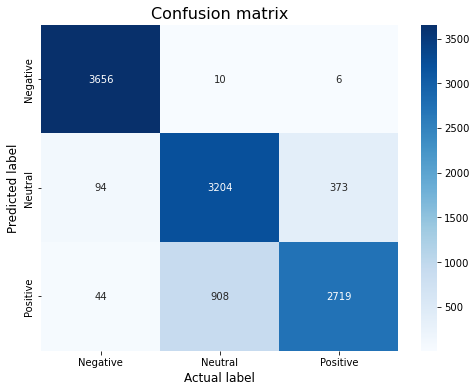

In [ ]:
#gradient boosting
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_prediction =  gb.predict(X_test)
accuracy_score(gb_prediction,y_test)


print("Classification Report:\n----------------------\n",)
print(classification_report(y_test,gb_prediction))

cm = confusion_matrix(y_test,gb_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

Classification Report:
----------------------

              precision    recall  f1-score   support

    negative       0.97      0.97      0.97      3672
     neutral       0.69      0.84      0.76      3671
    positive       0.81      0.63      0.71      3671

    accuracy                           0.81     11014
   macro avg       0.82      0.81      0.81     11014
weighted avg       0.82      0.81      0.81     11014



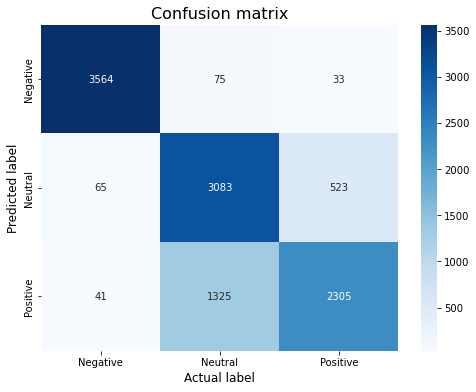

In [ ]:
#ada boost
ad = AdaBoostClassifier()
ad.fit(X_train,y_train)
ad_prediction =  ad.predict(X_test)
accuracy_score(ad_prediction,y_test)

print("Classification Report:\n----------------------\n",)
print(classification_report(y_test,ad_prediction))

cm = confusion_matrix(y_test,ad_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

Classification Report:
----------------------

              precision    recall  f1-score   support

    negative       0.97      0.99      0.98      3672
     neutral       0.87      0.92      0.89      3671
    positive       0.93      0.86      0.89      3671

    accuracy                           0.92     11014
   macro avg       0.92      0.92      0.92     11014
weighted avg       0.92      0.92      0.92     11014



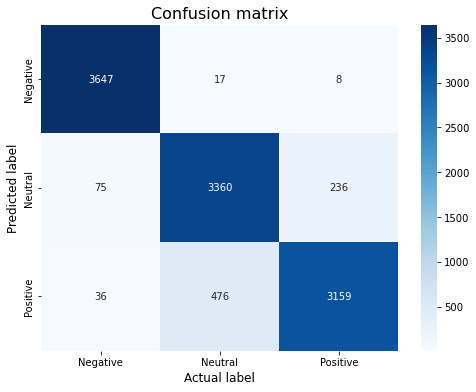

In [ ]:
model1=LogisticRegression(max_iter=5000,random_state=1)
model2=RandomForestClassifier(n_estimators=150,random_state=1)
model3=AdaBoostClassifier()
model_fin = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('ad', model3)], voting='hard')
model_fin.fit(X_train,y_train)
model_fin_prediction =  model_fin.predict(X_test)
accuracy_score(model_fin_prediction,y_test)

print("Classification Report:\n----------------------\n",)
print(classification_report(y_test,model_fin_prediction))

cm = confusion_matrix(y_test,model_fin_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

In [76]:
# ytest to list


[1,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 1,
 0,
 2,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
